# Simple Linear Regression_ Salary

In [92]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [94]:
cr= dataset.corr()

In [95]:
cr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [30]:
# import seaborn as sns
# sns.heatmap(cr)

### X is YearsExperience

### y is  Salary

In [84]:
X = dataset.iloc[:, :-1].values #feature (IV)
y = dataset.iloc[:, 1].values   #DV(Lable/ Output/Target)

Text(0, 0.5, 'Salary')

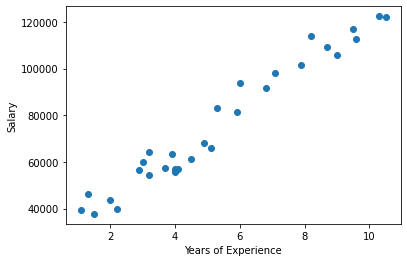

In [85]:
plt.scatter(X,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [86]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [87]:
X.shape, X_train.shape, X_test.shape

((30, 1), (21, 1), (9, 1))

In [48]:
y.shape, y_train.shape, y_test.shape

((30,), (21,), (9,))

Text(0, 0.5, 'Salary')

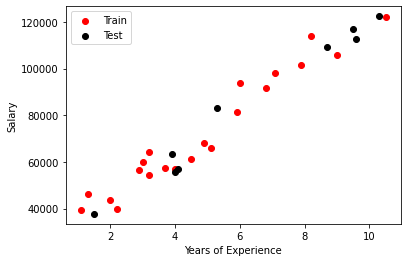

In [88]:
plt.scatter(X_train,y_train, color='red')
plt.scatter(X_test,y_test, color='black')
plt.legend(['Train','Test'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

***

In [89]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [90]:
aditya_lr= LinearRegression()

#### Train the model to Learn/Learning/ Model Building


In [91]:
aditya_lr.fit(X_train, y_train)

LinearRegression()

***

### y = c +  m*X
### y = b0 +  b1*X 
#### Let's see whats b0 and b1

In [62]:
aditya_lr.intercept_  #b0

26777.391341197632

In [64]:
aditya_lr.coef_   #b1

array([9360.26128619])

#### predicting a new result (for X=10.3)

In [65]:
y=26777.39 + (9360.26* 10.3)  # for X=10.3 years 
y

123188.06800000001

#### predicting a new result (for X=5.1)

In [66]:
y=26777.39 + (9360.26* 5.1)  # for X=10.3 years 
y

74514.716

#### predicting a new result (for X=10.3)

In [68]:
aditya_lr.predict([[5.1]])

array([74514.72390079])

***


#### Predicting the Test set results

In [70]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3]])

In [72]:
y_pred =aditya_lr.predict(X_test)

In [74]:
# Actual
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [75]:
#predicted
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

### comparing Actual vs Predicted

In [76]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3]])

In [77]:
pd.DataFrame({'Actual_Test':y_test ,'Predicted':y_pred})

,Actual_Test,Predicted
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158


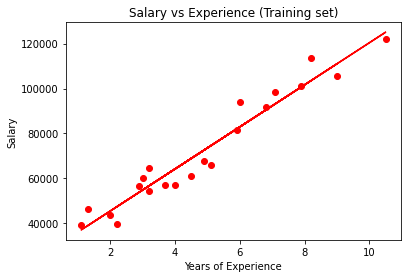

In [79]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, aditya_lr.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

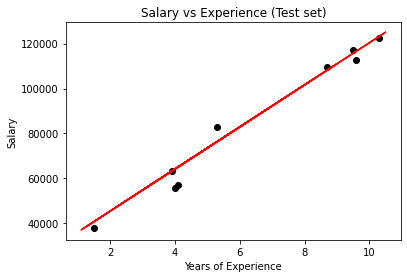

In [80]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_train, aditya_lr.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

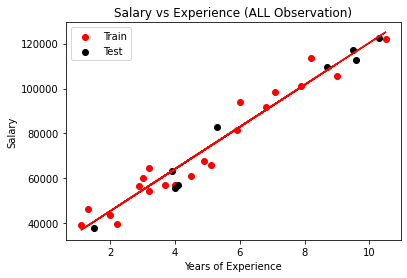

In [81]:
# Visualising the ALL results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'black')
plt.legend(['Train','Test'])
plt.plot(X_train, aditya_lr.predict(X_train), color = 'red')
plt.title('Salary vs Experience (ALL Observation)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

***

### Evaluating model performance

#### Root Mean Square Error(RMSE)


<img src='rmse.png' style='width: 400px'>

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt


sqrt(mean_squared_error(y_test,y_pred))

4834.260936361728

##### i.e. average Error(difference b/w  actual & predicted Salary) is 4834 Rs.

***
#### R2 score
How good is our Line compare to Average Line anybody can think of. (How goo our model fitted)

##### R2 Closer to 1  ==>  our model is better.

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9740993407213511

In [56]:
#or 
lr.score(X_test,y_test)

0.9740993407213511